## Explore image file and build image files path table

Unzip and extracct images data.

In [64]:
# !ls -ltr

In [65]:
# !tar -zxvf data.tar.gz

In [2]:
# import glob
import os
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image, display
import cv2
import magic
%matplotlib inline

In [6]:
data_path = "../data"
data_p = pathlib.Path(data_path)

In [7]:
images_list = [str(p) for p in list(data_p.glob("./*"))]

In [8]:
# print(images_list[2182])
images_list[:5]


['../data/有害垃圾_废镍镉电池和废氧化汞电池_纽扣电池_94.jpg',
 '../data/干垃圾_污损纸张_18.jpg',
 '../data/可回收物_废纸张_纸箱_47.jpg',
 '../data/干垃圾_干燥剂_36.jpg',
 '../data/可回收物_废纸张_纸袋_76.jpg']

#### See one sample of image

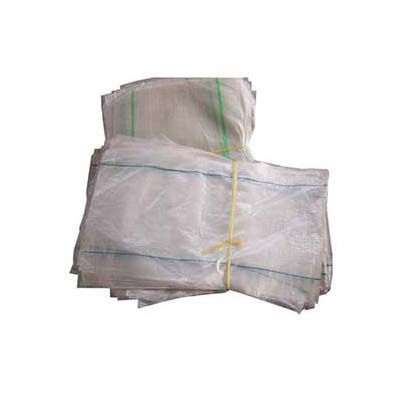

(400, 400, 3)


In [70]:
sample_image = '../data/干垃圾_编织袋_36.jpeg'
# sample_image = "../data/干垃圾_榴莲壳_7.jpg"
sample_im = cv2.imread(sample_image)
display(Image(sample_image))
print(sample_im.shape)

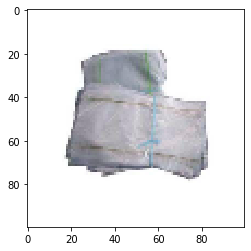

In [71]:
resized_sample_im = cv2.resize(sample_im, (100, 100))
plt.imshow(resized_sample_im)

#### Build filename and classes table

1. First is to clean up the suffix of images

In [72]:
filenames_list = [p.name for p in list(data_p.glob("./*"))]

In [73]:
suffixes_list = [p.suffix for p in list(data_p.glob("./*"))]

In [74]:
set(suffixes_list)

{'.2',
 '.ashx',
 '.aspx',
 '.axd',
 '.bmp',
 '.dpg',
 '.gif',
 '.html',
 '.img',
 '.jpeg',
 '.jpeg!heading',
 '.jpg',
 '.jpg!00',
 '.jpg!1000',
 '.jpg!345x0',
 '.jpg!360x240',
 '.jpg!412x429',
 '.jpg!555x333',
 '.jpg!560x350',
 '.jpg!600x800',
 '.jpg!710',
 '.jpg!bw700',
 '.jpg!ddb',
 '.jpg!focus',
 '.jpg!heading',
 '.jpg!l',
 '.jpg!logo',
 '.jpg!q90',
 '.jpg!s450x600',
 '.jpg!thumb',
 '.jpg!w340',
 '.jpg!w640',
 '.jpg!w700wb',
 '.jpg!w720',
 '.jpg!wd780',
 '.jpg!ww700',
 '.jpg!yeadwx',
 '.jpg-1440',
 '.jpg-kuan400px',
 '.jpg-sm',
 '.jpg-view',
 '.jpg@!middle',
 '.jpg@!middle2',
 '.jpg@!picb',
 '.jpg@!rw9',
 '.jpg@350w_350h',
 '.jpg@768w_1l',
 '.medium',
 '.php',
 '.png',
 '.png!heading',
 '.png!sy',
 '.png!w720',
 '.png-view',
 '.png-watermark',
 '.ss2',
 '.svg',
 '.webp',
 '.zhtml'}

In [75]:
# original image file suffixes
ori_img_suffixes = [
    ".gif"
    ,".jpeg"
    ,".jpg"
    ,".png"
    ,".bmp"
]

# cannot parse suffixes
excluded_suffixes = [
    ".svg"
    , ".webp"
    , ".riff"
    , ".html"
    , ".zhtml"
]

In [76]:
# Get a pathlib objects list
p_list = [p for p in list(data_p.glob("./*"))]

*WARNING:* No need to replace the extensions. Will use file type to check if it's readable image data. 

In [77]:
# Replace all files with suffixes which are not in original image file suffixes and cannot parse suffixes
"""rename_count = 0
for a in p_list:
    # print(a)
    if a.suffix in excluded_suffixes + ori_img_suffixes:
        # print(a.suffix)
        pass
    else:
        rename_count += 1
        filename_replace_ext = a.with_suffix('.jpg')
        a.rename(filename_replace_ext)
print("Total {} images renamed.".format(rename_count))"""

'rename_count = 0\nfor a in p_list:\n    # print(a)\n    if a.suffix in excluded_suffixes + ori_img_suffixes:\n        # print(a.suffix)\n        pass\n    else:\n        rename_count += 1\n        filename_replace_ext = a.with_suffix(\'.jpg\')\n        a.rename(filename_replace_ext)\nprint("Total {} images renamed.".format(rename_count))'

Extract classes from filename

In [78]:
images_list = [str(p) for p in list(data_p.glob("./*"))]
filenames_list = [p.name for p in list(data_p.glob("./*"))]
suffixes_list = [p.suffix for p in list(data_p.glob("./*"))]

In [79]:
# Check length
len(images_list) == len(filenames_list) == len(suffixes_list)

True

In [80]:
print(len(images_list))
# print(images_list[2182])
# print(filenames_list[2182])
# print(images_list.index("data/._可回收物_其他_插座_1.jpg"))
# print(images_list.index("data/可回收物_其他_插座_1.jpg"))
# # print(images_list[1139])

12942


In [81]:
# Parse classes from filename

r_list = []
for i, a in enumerate(filenames_list):
    # print(a)
    try:
        ext = suffixes_list[i]
        basename = a.split(".")[0]
        # print(basename)
        name_seg = basename.split("_")
        sub_id = name_seg.pop()
        sample = name_seg.pop()
        labels = {"level"+str(i):l for i,l in enumerate(name_seg)}
        r = {"_filename": a, "_format": ext, "sample": sample, "spider_id": sub_id}
        res = {**r, **labels}
        # print(res)
        r_list.append(res)
    except:
        print(i)

In [82]:
r_df = pd.DataFrame(r_list)

In [83]:
def is_readable_image_data(data_file):
    import magic
    try:
        magic_msg = magic.from_file(str(data_file))
    except Exception as e:
        print(e)
        return False
    if (
        magic_msg.startswith("JPEG image data") 
        or magic_msg.startswith("PNG image data") 
        # or magic_msg.startswith("GIF image data")
       ):
        return True
    else:
        return False

In [84]:
r_df['is_readable_image'] = r_df['_filename'].apply(lambda x: is_readable_image_data(str("../data/"+x)))

b'JPEG image data, Exif standard: [TIFF image data, big-endian, direntries=16, height=1119, bps=0, compression=none, PhotometricIntepretation=CMYK, manufacturer=Mamiya-OP Co.,Ltd., model=MAMIYA ZD, orientation=upper-left, width=840] name use count (30) exceeded'


In [85]:
r_df[~r_df['is_readable_image']].head()

,_filename,_format,sample,spider_id,level0,level1,is_readable_image
51,有害垃圾_废荧光灯管_卤素灯_70.webp,.webp,卤素灯,70,有害垃圾,废荧光灯管,False
54,干垃圾_打火机_54.gif,.gif,打火机,54,干垃圾,NaN,False
68,可回收物_废金属_指甲钳_96.jpg,.jpg,指甲钳,96,可回收物,废金属,False
94,可回收物_废织物_毛绒玩具_82.jpg,.jpg,毛绒玩具,82,可回收物,废织物,False
133,可回收物_废金属_废不锈钢_81.jpg,.jpg,废不锈钢,81,可回收物,废金属,False


In [86]:
print(r_df.shape)
print(r_df['is_readable_image'].value_counts())

(12942, 7)
True     12551
False      391
Name: is_readable_image, dtype: int64


In [87]:
filenames = ['../data/' + fname for fname in r_df['_filename'].tolist()]

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def is_completed_image(path):
    try:
        load_and_preprocess_image(path)
        return True
    except Exception as e:
        return False

def get_corrupted_image_files(file_list):
    cr_list = []
    
    for i, f in enumerate(filenames):
        try:
            load_and_preprocess_image(f)
        except Exception as e:
            cr_list.append((i, f))
            
    return cr_list

# corrupted_images = get_corrupted_image_files(filenames)
r_df['is_completed_image'] = r_df['_filename'].apply(lambda x: is_completed_image(str("../data/"+x)))

In [63]:
"""corrupted_images_index = [i[0] for i in corrupted_images]
print(len(corrupted_images_index))
corrupted_images"""

6


[(1384, './data/有害垃圾_废含汞温度计、废含汞血压计_水银血压计_56.jpg'),
 (4255, './data/湿垃圾_剩菜剩饭_茶叶渣_87.jpg'),
 (5142, './data/可回收物_废金属_废铜_18.jpg'),
 (6098, './data/湿垃圾_瓜皮果核_苹果皮_22.jpg'),
 (7621, './data/有害垃圾_废胶片及废相纸_x光片_59.jpg'),
 (7910, './data/干垃圾_榴莲壳_7.jpg')]

In [31]:
# r_df = r_df.iloc[~r_df.index.isin(corrupted_images_index)].copy()

In [89]:
r_df.head()

,_filename,_format,sample,spider_id,level0,level1,is_readable_image,is_completed_image
0,干垃圾_编织袋_36.jpeg,.jpeg,编织袋,36,干垃圾,NaN,True,True
1,湿垃圾_食材废料_水产_91.jpg,.jpg,水产,91,湿垃圾,食材废料,True,True
2,湿垃圾_过期食品_肉干_7.jpg,.jpg,肉干,7,湿垃圾,过期食品,True,True
3,干垃圾_橡皮泥_20.jpg,.jpg,橡皮泥,20,干垃圾,NaN,True,True
4,有害垃圾_废含汞温度计、废含汞血压计_水银体温计_84.jpg,.jpg,水银体温计,84,有害垃圾,废含汞温度计、废含汞血压计,True,True


In [90]:
r_df.to_csv("../_filename_dict.csv", index=False)

In [93]:
r_df['sample'].value_counts()

皮鞋      101
水果果皮    100
肉       100
蛋壳      100
糖果      100
       ... 
带胶制品     55
灰土       55
干燥剂      55
尼龙制品     51
家养植物      7
Name: sample, Length: 154, dtype: int64